In [1]:
%matplotlib ipympl
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LogNorm
import datetime
import os
dp = '/home/ebert/jupyter-notebooks/FNode-data'

In [10]:
exp_names = [
    '2018_04_30_15_13_08_cs-rb-load-collision-test',
    '2018_04_30_15_26_09_cs-rb-load-collision-test',
    '2018_04_30_15_51_30_cs-rb-load-collision-test',
    '2018_04_30_16_24_51_cs-rb-load-collision-test'
]
q = qdp.QDP(base_data_path=dp)
for exp_name in exp_names:
    exp_date = '_'.join(exp_name.split('_')[:3])
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
    q.load_data_file(experiment_file)

print "ivars: {}".format(q.experiments[0]['variable_list'])
roi_map = ['cs', 'rb']
cs_cuts = [[36],[3]]
rb_cuts = [[48],[3]]
q.set_thresholds(cs_cuts, roi=0)
q.set_thresholds(rb_cuts, roi=1)
retention = q.apply_thresholds()
tbl_str = "ivar:\t{0}\tretention:{1} +- {2}"

q.experiments[0]['variable_list']
try:
    xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']
except IndexError:
    xlab = 'iterator'

tbl_str = "ivar:\t{0:.3f}\tloading:{1:.3f}\tretention:{2:.3f} +- {3:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['loading'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined
name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined
name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined
name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined
ivars: [u'rb_d2_mot_amp']
no loading observed
ivar:	-9.000	loading:0.128	retention:0.830 +- 0.015
ivar:	-9.000	loading:0.210	retention:0.887 +- 0.010
ivar:	-100.000	loading:0.251	retention:0.868 +- nan
ivar:	-100.000	loading:0.001	retention:0.000 +- 0.258
ivar:	-9.000	loading:0.131	retention:0.820 +- 0.017
ivar:	-9.000	loading:0.183	retention:0.871 +- 0.011
ivar:	-100.000	loading:0.227	retention:0.824 +- nan
ivar:	-100.000	loading:0.000	retention:nan +- nan
ivar:	-9.000	loading:0.183	retention:0.805 +- 0.008
ivar:	-9.000	loading:0.162	retention:0.894 +- 0.009
ivar:	-100.000	loading:0.231	retention:0.803 +- nan
ivar:	-100.000	loading:0.001	retention:0.000 +- 0.258
ivar:	-9.000	loading:0.179	retention:0.810 +- 0.010
ivar:	-9

In [11]:
q.save_experiment_data(filename_prefix='cs_rb-collision_retention')
legends = ['{}'.format(x) for x in range(len(exp_names))]

In [12]:
fig, ax = plt.subplots()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
roi = 0
# fits = []
for e in range(len(retention['ivar'])):
#     fits.append(np.polyfit(retention['ivar'][e,:,roi], retention['retention'][e,:,roi], 1))
    l = len(retention['ivar'][e,:,roi])
#     if e == 3:
#         l = 4
    ax.errorbar(retention['ivar'][e,:l,roi], retention['retention'][e,:l,roi],
                yerr=retention['error'][e,:l,roi],
                fmt = colors[e]+'o-',
                label=legends[e]
    )
        
#     ax.plot(retention['ivar'][e,:,roi], retention['loading'][e,:,roi], colors[e]+'x')
#     ax.plot(retention['ivar'][e,:,roi], np.poly1d(fits[-1])(retention['ivar'][e,:,roi]), colors[e]+'-' ,label=legends[e])
ax.legend(bbox_to_anchor=(0.85, 0.95), loc=1, borderaxespad=0.)
ax.set_ylim(0.6, 1.01)
ax.set_xlabel(xlab)
ax.set_ylabel('Retention')
fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'cs_rb-collision_retention.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

FigureCanvasNbAgg()

<IPython.core.display.Javascript object>


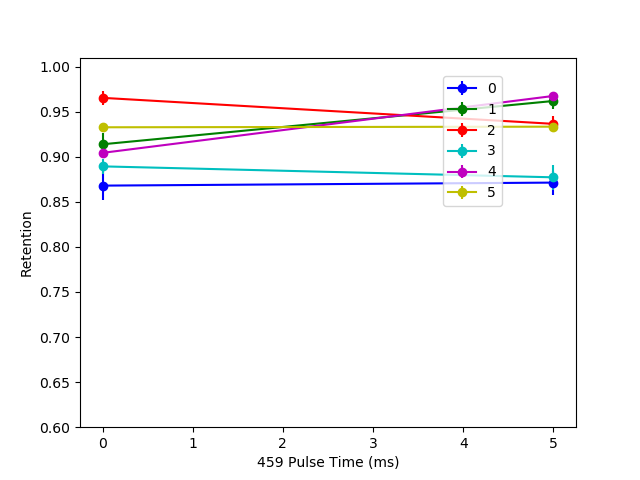

In [35]:
fig, ax = plt.subplots()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
roi = 1
# fits = []
for e in range(len(retention['ivar'])):
#     fits.append(np.polyfit(retention['ivar'][e,:,roi], retention['retention'][e,:,roi], 1))
    l = len(retention['ivar'][e,:,roi])
#     if e == 3:
#         l = 4
    ax.errorbar(retention['ivar'][e,:l,roi], retention['retention'][e,:l,roi],
                yerr=retention['error'][e,:l,roi],
                fmt = colors[e]+'o-',
                label=legends[e]
    )
        
#     ax.plot(retention['ivar'][e,:,roi], retention['loading'][e,:,roi], colors[e]+'x')
#     ax.plot(retention['ivar'][e,:,roi], np.poly1d(fits[-1])(retention['ivar'][e,:,roi]), colors[e]+'-' ,label=legends[e])
ax.legend(bbox_to_anchor=(0.85, 0.95), loc=1, borderaxespad=0.)
ax.set_ylim(0.6, 1.01)
ax.set_xlabel(xlab)
ax.set_ylabel('Retention')
fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'rb_retention.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

In [34]:
import scipy.optimize as optimize

def gaussian(x, a, x0, s, b):
    return b + a*np.exp(-0.5*((x-x0)/s)**2)

<IPython.core.display.Javascript object>


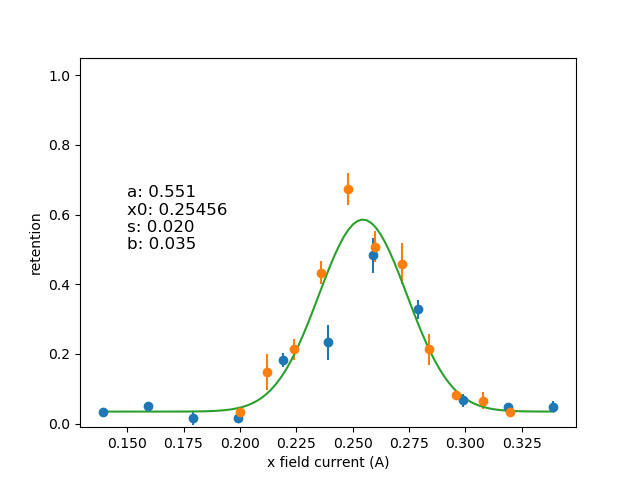

In [68]:
fig, ax = plt.subplots()
xdat = []
ydat = []
edat = []
for e in range(len(retention['ivar'])):
    l = len(retention['ivar'][e,:,roi])
#     if e == 3:
#         l = 4
    ax.errorbar(retention['ivar'][e,:l,roi], retention['retention'][e,:l,roi],
                yerr=retention['error'][e,:l,roi],
                fmt = 'o'
    )
    xdat += retention['ivar'][e,:l,roi].tolist()
    ydat += retention['retention'][e,:l,roi].tolist()
    edat += retention['error'][e,:l,roi].tolist()
ax.set_ylim(-0.01, 1.05)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')

guess = [0.6, 0.26, 0.04, 0.]
popt, pcov = optimize.curve_fit(
    gaussian,
    xdat,
    ydat,
    p0=guess,
    sigma=edat
)
xs = np.linspace(min(xdat),max(xdat),100)
ax.plot(xs, gaussian(xs, *popt))

fit_data = "a: {:.3f}\nx0: {:.5f}\ns: {:.3f}\nb: {:.3f}"
ax.text(0.15, 0.5, fit_data.format(*popt), fontsize=12)

fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'cs_op_depumping_iy.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

In [40]:
xdat

[[-1.0, -1.0],
 [-0.8, -0.8],
 [-0.6, -0.6],
 [-0.3999999999999999, -0.3999999999999999],
 [-0.19999999999999996, -0.19999999999999996],
 [0.0, 0.0],
 [0.20000000000000018, 0.20000000000000018],
 [0.40000000000000013, 0.40000000000000013],
 [0.6000000000000001, 0.6000000000000001],
 [0.8, 0.8],
 [1.0, 1.0],
 [-0.5, -0.5],
 [-0.7, -0.7],
 [-0.9, -0.9],
 [-1.1, -1.1],
 [-1.3, -1.3],
 [-1.5, -1.5],
 [-1.7000000000000002, -1.7000000000000002],
 [-1.9000000000000001, -1.9000000000000001],
 [-2.1, -2.1],
 [-2.3, -2.3],
 [-2.5, -2.5],
 [-2.0, -2.0],
 [-2.1, -2.1],
 [-2.2, -2.2],
 [-2.3, -2.3],
 [-2.4, -2.4],
 [-2.5, -2.5],
 [-2.6, -2.6],
 [-2.7, -2.7],
 [-2.8, -2.8],
 [-2.9, -2.9],
 [-3.0, -3.0],
 [-3.5, -3.5],
 [-3.3333333333333335, -3.3333333333333335],
 [-3.1666666666666665, -3.1666666666666665],
 [-3.0, -3.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [1.35807730942e-312, 1.094299833e-315],
 [0.0, 0.0],
 [0.0, nan],
 [0.0, 0.0]]

In [13]:
fig, ax = plt.subplots()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
roi = 0
# fits = []
for e in range(len(retention['ivar'])):
#     fits.append(np.polyfit(retention['ivar'][e,:,roi], retention['retention'][e,:,roi], 1))
    l = len(retention['ivar'][e,:,roi])
#     if e == 3:
#         l = 4
    ax.plot([1,0], retention['loading'][e,:l,roi],
            colors[e]+'o-',
            label=legends[e]
    )
        
#     ax.plot(retention['ivar'][e,:,roi], retention['loading'][e,:,roi], colors[e]+'x')
#     ax.plot(retention['ivar'][e,:,roi], np.poly1d(fits[-1])(retention['ivar'][e,:,roi]), colors[e]+'-' ,label=legends[e])
ax.legend(bbox_to_anchor=(0.85, 0.95), loc=1, borderaxespad=0.)
ax.set_ylim(0., .3)
ax.set_xlabel("Rb loading")
ax.set_ylabel('Loading')
fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'cs_rb-collision_loading.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

FigureCanvasNbAgg()

In [9]:
fig, ax = plt.subplots()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
roi = 0
# fits = []
for e in range(len(retention['ivar'])):
#     fits.append(np.polyfit(retention['ivar'][e,:,roi], retention['retention'][e,:,roi], 1))
    l = len(retention['ivar'][e,:,roi])
#     if e == 3:
#         l = 4
    ax.plot(retention['loading'][e,:l,1], retention['loading'][e,:l,roi],
            colors[e]+'o-',
            label=legends[e]
    )
        
#     ax.plot(retention['ivar'][e,:,roi], retention['loading'][e,:,roi], colors[e]+'x')
#     ax.plot(retention['ivar'][e,:,roi], np.poly1d(fits[-1])(retention['ivar'][e,:,roi]), colors[e]+'-' ,label=legends[e])
ax.legend(bbox_to_anchor=(0.85, 0.95), loc=1, borderaxespad=0.)
ax.set_ylim(0., .3)
ax.set_xlabel("Rb loading")
ax.set_ylabel('Cs Loading')
fmts = ['pdf', 'png']
fn = os.path.join(dp, os.path.dirname(experiment_file), 'cs_rb-collision_loadingXY.{}')
for fmt in fmts:
    fig.savefig(fn.format(fmt), dpi=200, format=fmt)

FigureCanvasNbAgg()